# Importing Libraries


In [ ]:
library(LearnBayes)

#  Exercises developed in R
*Albert, J. Bayesian Computation with R Second Edition Springer 2009*

### **Question 4 - Pag.16.** Performance of the traditional confidence interval for a proportion

Suppose one observes y that is binomially distributed with sample size n
and probability of success p. 
The standard 90% confidence interval for p
is given by

> $C(y) = (p − 1.645 \sqrt{\frac{p(1 − p)}{
n}}, p + 1.645 \sqrt{\frac{p(1 − p)}{
n}})$

where $p = \frac{y}{n} $. We use this procedure under the assumption that
> $P(p ∈ C(y)) = 0.90 $ for all  $0 < p < 1$

The function binomial.conf.interval will return the limits of a 90%
confidence interval given values of y and n.

a) Read the function binomial.conf.interval into R

In [17]:
binomial.conf.interval = function(y,n){
    z = qnorm(.95)
    phat = y/n
    se = sqrt(phat*(1-phat)/n)
    return (c(phat-z*se,phat+z*se))
}

b) Suppose that samples of size n = 20 are taken and the true value
of the proportion is p = .5. Using the rbinom command, simulate
a value of y and use binomial.conf.interval to compute the 90%
confidence interval. Repeat this a total of 20 times, and estimate the
true probability of coverage P(p ∈ C(y)).

In [18]:
p = .5
n = 20

y_bin = rbinom(n, n, p)

binomial.conf.interval(y_bin, n)

[1] 0.2198153 0.3160998 0.4198153 0.2670216 0.3670216 0.2198153 0.4198153
 [8] 0.2198153 0.5907377 0.3160998 0.2670216 0.2670216 0.4745704 0.3670216
[15] 0.4198153 0.2198153 0.3670216 0.2670216 0.3160998 0.4745704 0.5801847
[22] 0.6839002 0.7801847 0.6329784 0.7329784 0.5801847 0.7801847 0.5801847
[29] 0.9092623 0.6839002 0.6329784 0.6329784 0.8254296 0.7329784 0.7801847
[36] 0.5801847 0.7329784 0.6329784 0.6839002 0.8254296

c) Suppose that n = 20 and the true value of the proportion is p = .05.
Simulate 20 binomial random variates with n = 20 and p = .05, and
for each simulated y compute a 90% confidence interval. Estimate the
true probability of coverage.

In [19]:
p = .05
n = 20

y_bin = rbinom(n, n, p)

binomial.conf.interval(y_bin, n)

[1] -0.03016025 -0.01034014 -0.03016025 -0.01034014 -0.03016025 -0.01034014
 [7] -0.01034014  0.00000000 -0.03016025  0.00000000 -0.01034014 -0.03016025
[13]  0.00000000  0.00000000  0.00000000  0.00000000 -0.03016025 -0.03016025
[19] -0.01034014  0.00000000  0.13016025  0.21034014  0.13016025  0.21034014
[25]  0.13016025  0.21034014  0.21034014  0.00000000  0.13016025  0.00000000
[31]  0.21034014  0.13016025  0.00000000  0.00000000  0.00000000  0.00000000
[37]  0.13016025  0.13016025  0.21034014  0.00000000

### **Question 3 - Pag.36.** Estimating a proportion and prediction of a future sample.

A study reported on the long-term effects of exposure to low levels of
lead in childhood. Researchers analyzed children’s shed primary teeth for
lead content. Of the children whose teeth had a lead content of more than
22.22 parts per million (ppm), 22 eventually graduated from high school
and 7 did not. Suppose your prior density for p, the proportion of all such
children who will graduate from high school, is beta(1, 1), and so your
posterior density is beta(23, 8).

a) Use the function qbeta to find a 90% interval estimate for p.

In [20]:
p = c(0.05, 0.95)

qbeta(p, 23, 8)

[1] 0.6060526 0.8598149

b) Use the function pbeta to find the probability that p exceeds .6

In [21]:
1 - pbeta(.6, 23, 8)

[1] 0.9564759

c) Use the function rbeta to take a simulated sample of size 1000 from
the posterior distribution of p.

In [22]:
p= rbeta(1000, 23, 8)

pbeta(c(23,8), 10, c(9,10))

[1] 1 1

d) Suppose you find ten more children who have a lead content of more
than 22.22 ppm. Find the predictive probability that nine or ten of
them will graduate from high school. (Use your simulated sample from
part (c) and the rbinom function to take a simulated sample from the
predictive distribution.)

In [23]:
table(rbinom(1000,10,p))


  2   3   4   5   6   7   8   9  10 
  3  11  28  70 152 223 269 168  76 

### **Question 5 - Pag. 36.** Estimating a normal mean with a discrete prior.

Suppose you are interested in estimating the average total snowfall per
year μ (in inches) for a large city on the East Coast of the United States.

Assume individual yearly snow totals $y_{1}, ..., y_{n}$ are collected from a population that is assumed to be normally distributed with mean μ and known
standard deviation $σ = 10$ inches.

a) Before collecting data, suppose you believe that the mean snowfall μ
can be the values 20, 30, 40, 50, 60, and 70 inches with the following
probabilities:

>μ | 20 | 30 | 40 | 50 | 60 | 70 
>--- | --- | --- | --- | --- | --- | --- |
>g(μ) | .1 | .15 | .25 | .25 | .15 | .1

Place the values of μ in the vector mu and the associated prior probabilities in the vector prior.

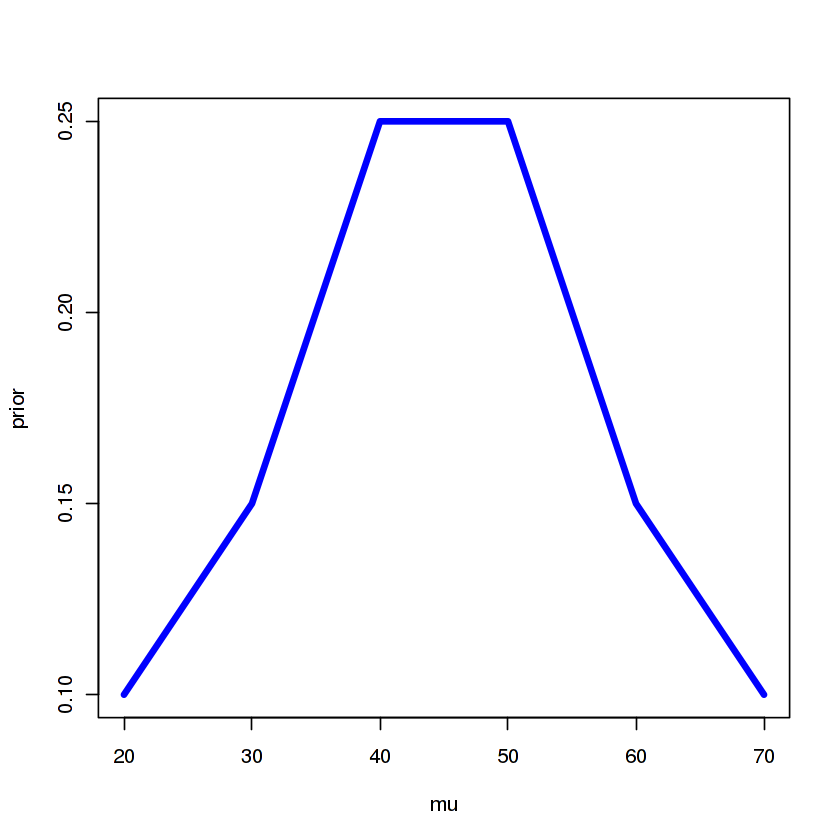

In [27]:
mu = seq(20, 70, by=10)
prior = c(.1,.15,.25,.25,.15,.1)

plot(mu, prior, type="l", col=4, lwd=4)

In [28]:
2 * min(1-pbinom(8, 20, 0.2), pbinom(8, 20, 0.2))

[1] 0.01996357

b) Suppose you observe the yearly snowfall totals 38.6, 42.4, 57.5, 40.5,
51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7, and 6.4 inches. Enter these data
into a vector y and compute the sample mean ybar.

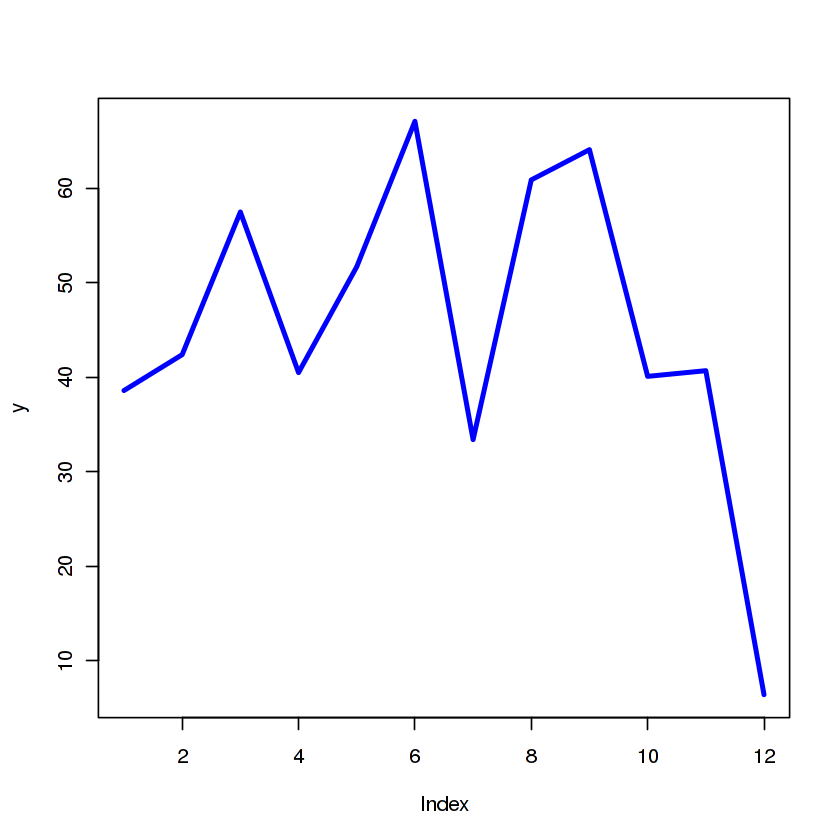

In [30]:
y= c(38.6,42.4,57.5,40.5,51.7,67.1,33.4,60.9,64.1,40.1,40.7,6.4)
ybar= mean(y)

plot(y, type="l", col=4, lwd=3)

c) In this problem, the likelihood function is given by
> $L(μ) ∝ exp (-\frac{n}{2σ^2} (μ − \bar y)^2)$

where $\bar y$ is the sample mean. Compute the likelihood on the list of
values in mu and place the likelihood values in the vector like.

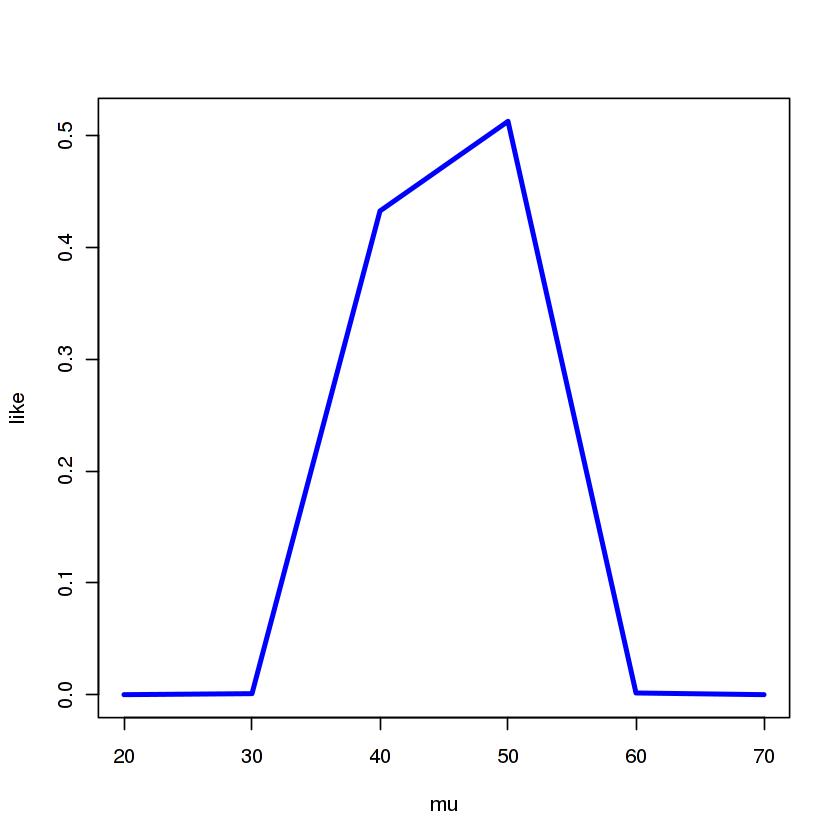

In [35]:
sigma = 10
n = length(mu)
like = rep(0,n)

for (i in 1:n) {
  like[i] = exp(1/2*-n/(sigma)^2*(mu[i]-ybar)^2)
}

plot(mu,like,type="l",col=4,lwd=3)

d) One can compute the posterior probabilities for μ using the formula
```
post = prior * like/sum(prior*like)
```
Compute the posterior probabilities of μ for this example.

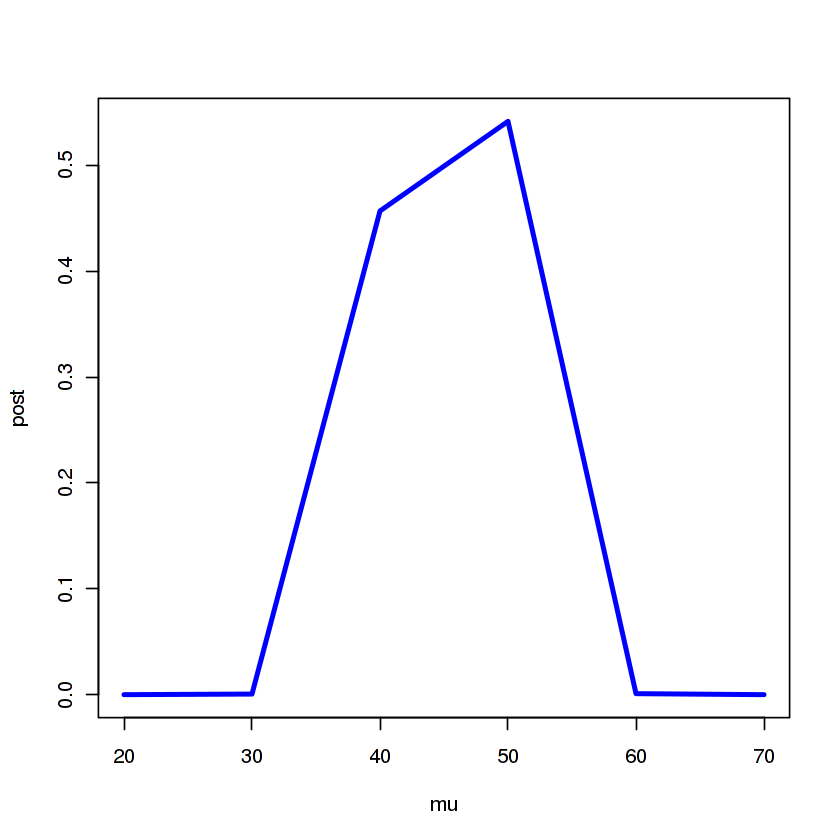

In [36]:
post = rep(0,n)

for (i in 1:n) {
  post[i] = prior[i]*like[i]/sum(prior*like)
}

plot(mu,post,type="l",col=4,lwd=3)

In [37]:
cbind(mu, post)

mu,post
20,1.981176e-09
30,5.732950e-04
40,4.569028e-01
50,5.415692e-01
60,9.547031e-04
70,4.635252e-09


e) Using the function discint, find an 80% probability interval for μ

In [44]:
prob = 0.8
disc = cbind(mu, post)


discint(disc,prob)

$prob
[1] 0.9330795

$set
[1] 40 50 60

### **Question 6 - Pag.37** Estimating a Poisson mean using a discrete prior (from Antleman (1996)).

Suppose you own a trucking company with a large fleet of trucks. Breakdowns occur randomly in time and the number of breakdowns during an
interval of t days is assumed to be Poisson distributed with mean tλ. The
parameter λ is the daily breakdown rate. The possible values for λ are
.5, 1, 1.5, 2, 2.5, and 3 with respective probabilities .1, .2, .3, .2, .15, and
.05. If one observes y breakdowns, then the posterior probability of λ is
proportional to:

> $g(λ) exp(−tλ)(tλ)^y$

where g is the prior probability.

a) If 12 trucks break down in a six-day period, find the posterior probabilities for the different rate values.

In [42]:
lambda

[1] 0.5 1.0 1.5 2.0 2.5 3.0

In [40]:
lambda <- seq(0.5,3,by=0.5)
prior <- c(0.1,0.2,0.3,0.2,0.15,0.05)

y=12; t=6

post <- prior * exp(-t*lambda)*(t*lambda)^y/sum(prior*exp(-t*lambda)*(t*lambda)^y)

cbind(lambda,post)

lambda,post
0.5,9.021401e-05
1.0,3.679430e-02
1.5,3.565196e-01
2.0,3.735713e-01
2.5,2.029885e-01
3.0,3.003598e-02


b) Find the probability that there are no breakdowns during the next
week. Hint: If the rate is λ, the conditional probability of no breakdowns during a seven-day period is given by exp{−7λ}. One can compute this predictive probability by multiplying a list of conditional
probabilities by the posterior probabilities of λ and finding the sum
of the products.

In [41]:
y=0; t=7

prob= prior * exp(-t * lambda) * (t * lambda)^y / sum(prior * exp(-t * lambda) * (t * lambda)^y)

cbind(lambda,prob)

lambda,prob
0.5,9.405685e-01
1.0,5.680542e-02
1.5,2.573062e-03
2.0,5.179984e-05
2.5,1.173165e-06
3.0,1.180883e-08
